In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sodapy import Socrata # API
  # seems to have problems loading e.g. jobs_created
import collections
import math


### load data

In [2]:
'''from API seems to have problems loading e.g. jobs_created

client = Socrata("data.cityofnewyork.us", None)

# https://data.cityofnewyork.us/resource/bug8-9f3g.json
results = client.get("bug8-9f3g")

# Convert to pandas DataFrame
energy_data = pd.DataFrame.from_records(results)
'''

# read while converting numbers with thousands comma to float
energy_data = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv', thousands=',')


In [3]:
energy_data.head()

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,...,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,...,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,...,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,...,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,...,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan


In [4]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Company Name                               450 non-null    object 
 1   company contact                            450 non-null    object 
 2   company email                              433 non-null    object 
 3   company phone                              450 non-null    object 
 4   Address                                    450 non-null    object 
 5   City                                       450 non-null    object 
 6   State                                      450 non-null    object 
 7   Postcode                                   450 non-null    int64  
 8   Industry                                   450 non-null    object 
 9   Industry descr                             434 non-null    object 
 10  Company Type              

In [5]:
energy_data.columns

Index(['Company Name', 'company contact', 'company email', 'company phone',
       'Address', 'City', 'State', 'Postcode', 'Industry', 'Industry descr',
       'Company Type', 'Current fulltime', 'Job created', 'Job retain',
       'Effective Date', 'Total Savings',
       'Savings from beginning receiving benefits', 'Borough', 'Latitude',
       'Longitude', 'Community Board', 'Council District', 'Census Tract',
       'BIN', 'BBL', 'NTA'],
      dtype='object')

### 1. How many different companies are represented in the data set?

In [6]:
energy_data['Company Name']

0                                1 State Street
1                                100 Church LLC
2                          100 Wall Investments
3                   1-10 Bush Terminal Owner LP
4      120 Broadway Acquisitions JV, LLC (Ldmk)
                         ...                   
445                           WONTON FOOD, INC.
446                                  Wood Works
447             WorldWide Plumbing Supply, Inc.
448                           WUD Furniture LLC
449                         Wurtec Incorporated
Name: Company Name, Length: 450, dtype: object

In [7]:
len(energy_data['Company Name'].unique())

439

In [8]:
# verify
name_counts = collections.Counter(energy_data['Company Name'])
len(name_counts)

439

### 2. What is the total number of jobs created for businesses in Queens?

In [9]:
job_counts = collections.Counter(energy_data['Job created'])

In [10]:
job_counts = energy_data['Job created'].value_counts()

In [11]:
job_counts

10.0    3
2.0     2
60.0    1
5.0     1
12.0    1
15.0    1
3.0     1
20.0    1
Name: Job created, dtype: int64

In [12]:
# counts of unique values only
np.sum(energy_data['Job created'].value_counts().index.values)

127.0

In [13]:
# boolean indexing, filter and create new df with only job created values
jobs_created = energy_data[energy_data['Job created'] > 0]

# sum over values of this column in this df
np.sum(jobs_created['Job created'])

149.0

In [14]:
# more concise way if do not want to create new df
sum(energy_data['Job created'][energy_data['Job created'] > 0])

149.0

### 3. How many different unique email domains names are there in the data set?

In [15]:
# use built in pandas method .str.split by delimiter
emails = energy_data['company email'].str.split('@')

# list comprehension for last element of each list of split strings, after filtering out nans
domains = [ei[-1] for ei in emails[emails.notna()]]

# show top 10 domains
print(collections.Counter(domains).most_common(10))


[('gmail.com', 30), ('aol.com', 22), ('energyspec.com', 3), ('yahoo.com', 3), ('silvercupstudios.com', 3), ('verizon.net', 3), ('hotmail.com', 3), ('fedex.com', 3), ('silvprop.com', 2), ('KLCNY.com', 2)]


In [16]:
# number of unique domains
len(collections.Counter(domains))

361

### 4. Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?

In [17]:
energy_data['NTA']

0                                                Midwood
1                 SoHo-TriBeCa-Civic Center-Little Italy
2                      Battery Park City-Lower Manhattan
3                                       Sunset Park West
4                      Battery Park City-Lower Manhattan
                             ...                        
445                                       Bushwick South
446                                       Bushwick South
447    Mariner's Harbor-Arlington-Port Ivory-Granitev...
448                                  Crown Heights North
449                                              Astoria
Name: NTA, Length: 450, dtype: object

In [18]:
# generate counts and create dictionary filtered from nan and values greater than 4
NTA_counts = collections.Counter(energy_data['NTA'])
NTA_counts_fil = {k: v for k, v in NTA_counts.items() if type(k) == str and v > 4}
NTA_counts_fil

{'SoHo-TriBeCa-Civic Center-Little Italy': 5,
 'Battery Park City-Lower Manhattan': 9,
 'Sunset Park West': 48,
 'Hunters Point-Sunnyside-West Maspeth': 75,
 'College Point': 7,
 'Carroll Gardens-Columbia Street-Red Hook': 11,
 'Steinway': 7,
 'DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill': 10,
 'Hunts Point': 13,
 'Bushwick South': 10,
 'Manhattanville': 9,
 'Crown Heights North': 9,
 'Queensbridge-Ravenswood-Long Island City': 16,
 'Springfield Gardens South-Brookville': 5,
 'Mott Haven-Port Morris': 14,
 'Maspeth': 9,
 'park-cemetery-etc-Brooklyn': 15,
 'Greenpoint': 14,
 'East Williamsburg': 11,
 'East New York': 9}

In [19]:
savings_mean = {}
jobs_total_NTA = {}
for k, v in NTA_counts_fil.items():
    df_fil = energy_data[energy_data['NTA'] == k]
    savings_mean[k] = df_fil['Total Savings'].mean()
    jobs_total_NTA[k] = df_fil['Job created'].sum()
    # visualize
    print(df_fil['Total Savings'])
    print(f"total savings mean = {df_fil['Total Savings'].mean()}")
    print(f"jobs created sum = {df_fil['Job created'].sum()}")
    

1      136578.20
222       255.99
304      5671.16
310      1356.05
368     42208.72
Name: Total Savings, dtype: float64
total savings mean = 37214.024
jobs created sum = 0.0
2       302959.40
4       922407.32
5       368601.17
10       93675.37
11       46523.01
90       10858.38
110     172185.05
124     742825.88
298    1568981.59
Name: Total Savings, dtype: float64
total savings mean = 469890.79666666663
jobs created sum = 0.0
3        2159.67
21       5268.09
23      11789.99
27       1868.34
38        512.84
40       1538.23
51       2691.22
64       3283.98
68       1152.62
70       4717.77
73      22853.53
82       1242.38
86       6034.54
87     141833.39
97        235.26
107      1387.94
114      5096.14
115      5580.07
116      5012.60
122      4160.38
128    335778.11
153       564.38
199       -23.92
209      4726.00
211       212.59
221      2835.81
229      1811.56
246     40015.98
248       639.53
249     11774.89
251       300.10
254      5607.59
262      1371.57
279

In [20]:
savings_mean

{'SoHo-TriBeCa-Civic Center-Little Italy': 37214.024,
 'Battery Park City-Lower Manhattan': 469890.79666666663,
 'Sunset Park West': 14316.976875000002,
 'Hunters Point-Sunnyside-West Maspeth': 23931.398933333337,
 'College Point': 17159.372857142855,
 'Carroll Gardens-Columbia Street-Red Hook': 24337.390000000003,
 'Steinway': 11227.155714285715,
 'DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill': 59950.340000000004,
 'Hunts Point': 39246.016153846154,
 'Bushwick South': 26140.455000000005,
 'Manhattanville': 2760.8888888888887,
 'Crown Heights North': 4036.298888888889,
 'Queensbridge-Ravenswood-Long Island City': 61830.770625,
 'Springfield Gardens South-Brookville': 17757.662,
 'Mott Haven-Port Morris': 17843.937857142857,
 'Maspeth': 6658.283333333334,
 'park-cemetery-etc-Brooklyn': 14327.419333333331,
 'Greenpoint': 9753.649285714284,
 'East Williamsburg': 13990.626363636366,
 'East New York': 48433.09333333333}

In [21]:
jobs_total_NTA

{'SoHo-TriBeCa-Civic Center-Little Italy': 0.0,
 'Battery Park City-Lower Manhattan': 0.0,
 'Sunset Park West': 0.0,
 'Hunters Point-Sunnyside-West Maspeth': 0.0,
 'College Point': 2.0,
 'Carroll Gardens-Columbia Street-Red Hook': 0.0,
 'Steinway': 20.0,
 'DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill': 0.0,
 'Hunts Point': 12.0,
 'Bushwick South': 10.0,
 'Manhattanville': 0.0,
 'Crown Heights North': 0.0,
 'Queensbridge-Ravenswood-Long Island City': 0.0,
 'Springfield Gardens South-Brookville': 0.0,
 'Mott Haven-Port Morris': 10.0,
 'Maspeth': 10.0,
 'park-cemetery-etc-Brooklyn': 0.0,
 'Greenpoint': 0.0,
 'East Williamsburg': 0.0,
 'East New York': 15.0}

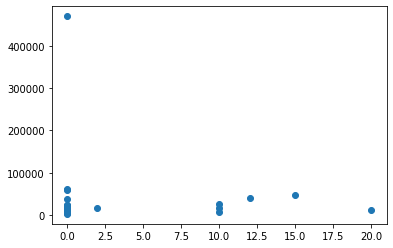

In [22]:
plt.scatter(jobs_total_NTA.values(), savings_mean.values())

(array([17.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  2760.88888889,  49473.87966667,  96186.87044444, 142899.86122222,
        189612.852     , 236325.84277778, 283038.83355556, 329751.82433333,
        376464.81511111, 423177.80588889, 469890.79666667]),
 <BarContainer object of 10 artists>)

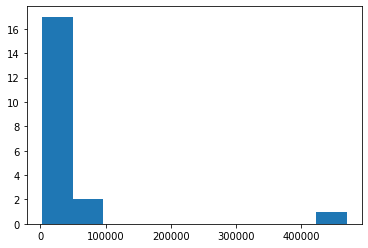

In [23]:
# histogram of the log of the average total savings.
plt.hist(savings_mean.values())

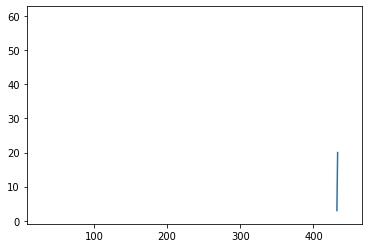

In [24]:
# line plot of the total jobs created for each month.
plt.plot(energy_data['Job created'])